# 캐글 - Bike Sharing Demand

# https://www.kaggle.com/competitions/bike-sharing-demand/overview

## 공유 자전거 수요 예측

### 데이터 설명

- datetime: hourly date + timestamp  
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday: whether the day is considered a holiday
- workingday: whether the day is neither a weekend nor holiday
- weather 
          - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
          - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp: temperature in Celsius
- atemp: "feels like" temperature in Celsius
- humidity: relative humidity
- windspeed: wind speed
- casual: number of non-registered user rentals initiated
- registered: number of registered user rentals initiated
- count: number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 캐글 데이터 불러오기

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'parkssunyoung'
os.environ['KAGGLE_KEY'] = '0902c94d8f3ad7e48999476287ff8c40'

In [3]:
!kaggle competitions download -c bike-sharing-demand
!unzip '*.zip'

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 62.2MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# train 칼럼 타입 확인

train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 2. datetime 칼럼 형식 변경 및 새로운 칼럼 추가

In [9]:
# 기존 datetime 칼럼의 형식은 object이므로 날짜 형식인 datetime으로 변경 필요

train['datetime'] = pd.to_datetime(train['datetime'])

In [10]:
# datetime 칼럼을 이용해 year, hour, weekday 칼럼 추가 생성

train['year'] = train['datetime'].dt.year
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


In [11]:
# train데이터에서 수행한 내용 test데이터에도 그대로 적용

test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


# 3. 추가한 칼럼의 유용성 확인_boxplot 이용

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


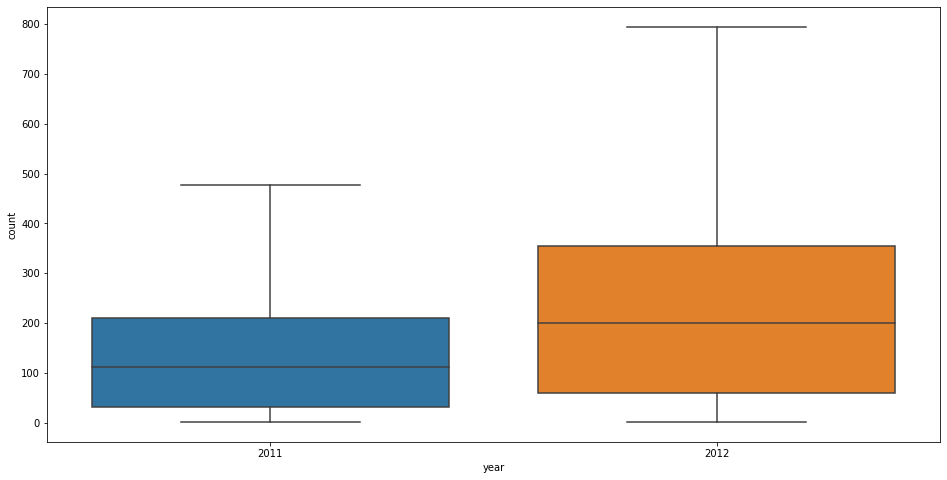

In [12]:
plt.figure(figsize = (16, 8))     # boxplot 크기 설정
sns.boxplot(train['year'], train['count'], showfliers = False)     # 확인하고자 하는 칼럼, 예측칼럼, 아웃라이어 제거

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


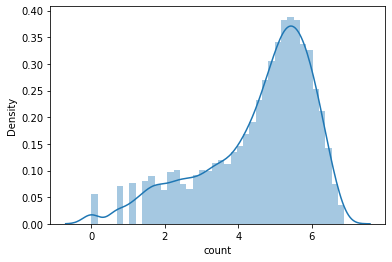

In [13]:
sns.distplot(np.log(train['count']))

- 회귀 데이터 사용 시 정답 분포가 한 쪽으로 쏠려 있으면 np.log 사용해서 차이 줄여주는 것이 좋음

In [15]:
train.groupby('year')['count'].mean()     # groupby()함수 사용해서 year별 count의 평균 확인

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [16]:
train['year'].value_counts()     # value_counts()함수 사용해서 각 연도가 몇 개 있는지 확인

2012    5464
2011    5422
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


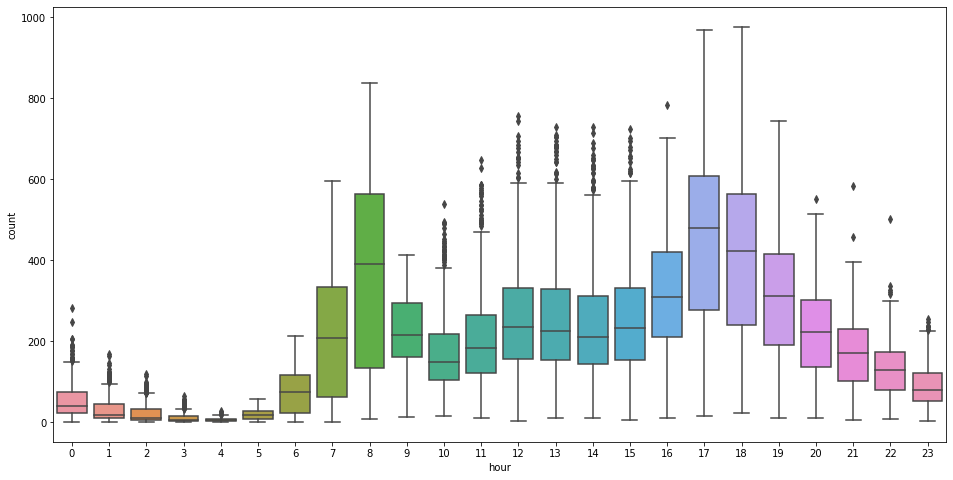

In [17]:
plt.figure(figsize = (16, 8))
sns.boxplot(train['hour'], train['count'])

- problem: 오전 10시 ~ 오후 3시 사이에 이상점이 많음
- why? 사용자들의 이용 패턴이 달라서 그런가?
- solution: 주중과 주말로 나눠서 분석 시도

In [18]:
# 주말

weekend = train[train['workingday'] == 0]     # workingday = 0이 주말
weekend

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,2012,19,6
10810,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,2012,20,6
10811,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,2012,21,6
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,2012,22,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


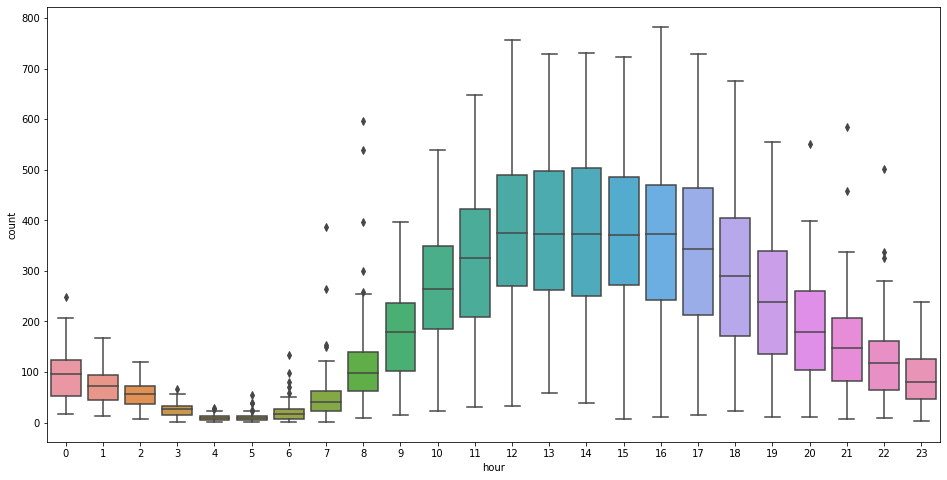

In [19]:
plt.figure(figsize = (16, 8))
sns.boxplot(weekend['hour'], weekend['count'])

- 주말 데이터만 시각화 해보니 주중+주말 합쳐있을 때보다 이상점이 확연히 줄어듦
- 주말에는 오전 10시 ~ 오후 3시에 공유 자전거 이용 횟수가 많음

In [20]:
# 주중

weekday = train[train['workingday'] == 1]
weekday

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,weekday
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,2011,0,0
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,2011,1,0
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,4,0
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,2011,5,0
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,2011,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


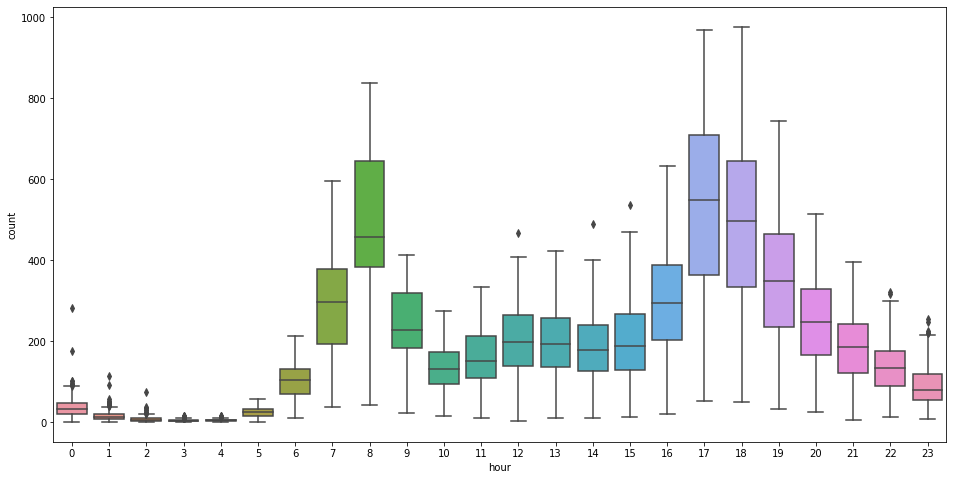

In [21]:
plt.figure(figsize = (16, 8))
sns.boxplot(weekday['hour'], weekday['count'])

- 주중에는 오전 10시 ~ 오후 3시 사이에 공유 자전거 이용 횟수 적음
- 따라서 주말과 주중의 사용패턴 차이로 인해 주중+주말 데이터에서는 이상점이 많이 나왔던 것임을 확인할 수 있음

# 4. 불필요한 칼럼 제거_데이터 전처리

In [22]:
train2 = train.drop(['datetime', 'casual', 'registered', 'count'], axis = 1)     # 칼럼을 제외하기 위해서는 axis = 1
train2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,22,2


In [23]:
test2 = test.drop(['datetime'], axis = 1)
test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,19,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,20,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,21,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,22,0


# 5. 모델링(모델 불러오기, 모델 선언, 모델 훈련, 결과 예측)